# Segmenting Breast Yltrasound Images using YOLOv8

## 1. Introduction

### Importance of Ultrasound Imaging in Medicine

Ultrasound imaging is a crucial tool in modern medicine. It uses high-frequency sound waves to create images of the body's internal structures, providing detailed views without the radiation risks associated with other imaging techniques like X-rays or CT scans. Ultrasound is widely used to examine organs, tissues, and blood vessels, and to monitor fetal development during pregnancy.

**Key Importance:**
1. **Non-invasive Diagnostics:** Allows evaluation of various medical conditions without invasive procedures.
2. **Treatment Monitoring:** Helps doctors assess the effectiveness of treatments in real time.
3. **Procedure Guidance:** Used to guide procedures like biopsies or targeted treatments.

For more detailed information, visit [this page from the National Institute of Biomedical Imaging and Bioengineering (NIH)](https://www.nibib.nih.gov/science-education/science-topics/ultrasound).

### Applications of AI and Deep Learning in Medical Image Analysis

Artificial Intelligence (AI) and deep learning are transforming the field of medical image analysis. These technologies can assist in several areas:

1. **Automated Detection and Diagnosis:** Algorithms can detect anomalies and diseases with high accuracy, sometimes even outperforming human diagnosticians.
2. **Quantitative Analysis:** Capable of automatically quantifying features in images, such as tumor size, which is crucial for monitoring diseases.
3. **Reduced Diagnosis Time:** Automating certain aspects of image analysis can significantly reduce the time medical professionals spend interpreting images.

For more details on how AI is changing medical image analysis, explore [this article from Nature](https://www.nature.com/articles/d41586-019-03845-1).

### Semantic Segmentation in Medical Imaging

Semantic segmentation is a computer vision technique that involves identifying and classifying each pixel in an image according to the category it belongs to. In medical imaging, this can involve distinguishing between different types of tissues, organs, or identifying specific disease areas.

**Applications in Medicine:**
- **Tumor Delineation:** Precise identification of tumor boundaries.
- **Anatomical Structure Identification:** Separating and labeling different parts of the body in medical images.
- **Tissue Analysis:** Classifying types of tissues for diagnosis and treatment planning.

For further information on semantic segmentation and its applications in medical imaging, you can read [this article from Springer](https://link.springer.com/article/10.1007/s10462-020-09854-1).

---
**Install Kaggle API Library**

---

In [1]:
%pip install -q kaggle


---
**Upload your Kaggle API Key**

---

In [2]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


---
**Copy the API key to `~/.kaggle`**

---

In [3]:
%mkdir -p ~/.kaggle
%cp ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls -al ~

total 72
drwx------ 1 root root 4096 Jul 25 07:58 .
drwxr-xr-x 1 root root 4096 Jul 25 07:45 ..
-r-xr-xr-x 1 root root 1169 Jan  1  2000 .bashrc
drwxr-xr-x 1 root root 4096 Jul 23 13:46 .cache
drwxr-xr-x 3 root root 4096 Jul 23 13:46 .config
drwxr-xr-x 5 root root 4096 Jul 23 13:46 .ipython
drwx------ 1 root root 4096 Jul 23 13:46 .jupyter
drwxr-xr-x 2 root root 4096 Jul 25 07:58 .kaggle
drwxr-xr-x 2 root root 4096 Jul 25 07:45 .keras
drwx------ 3 root root 4096 Jul 23 13:13 .launchpadlib
drwxr-xr-x 1 root root 4096 Jul 23 13:46 .local
drwxr-xr-x 4 root root 4096 Jul 23 13:46 .npm
-rw-r--r-- 1 root root  161 Jul  9  2019 .profile
-r-xr-xr-x 1 root root  254 Jan  1  2000 .tmux.conf
-rw-r--r-- 1 root root  211 Jul 23 13:46 .wget-hsts


## [Breast Ultrasound Images dataset](https://www.kaggle.com/datasets/aryashah2k/breast-ultrasound-images-dataset)

Breast cancer is one of the most common causes of death among women worldwide. Early detection helps in reducing the number of early deaths. The data reviews the medical images of breast cancer using ultrasound scan. Breast Ultrasound Dataset is categorized into three classes: normal, benign, and malignant images. Breast ultrasound images can produce great results in classification, detection, and segmentation of breast cancer when combined with machine learning.

### Data

The data collected at baseline include breast ultrasound images among women in ages between 25 and 75 years old. This data was collected in 2018. The number of patients is 600 female patients. The dataset consists of 780 images with an average image size of 500*500 pixels. The images are in PNG format. The ground truth images are presented with original images. The images are categorized into three classes, which are normal, benign, and malignant.

If you use this dataset, please cite:

`Al-Dhabyani W, Gomaa M, Khaled H, Fahmy A. Dataset of breast ultrasound images. Data in Brief. 2020 Feb;28:104863. DOI: 10.1016/j.dib.2019.104863.`

---
**List kaggle datasets with search word 'breast'**

---

In [4]:
!kaggle datasets list -s "breast"

ref                                                              title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
reihanenamdari/breast-cancer                                     Breast Cancer                                   43KB  2022-08-08 19:25:55          21480        277  1.0              
yasserh/breast-cancer-dataset                                    Breast Cancer Dataset                           49KB  2021-12-29 19:07:20          58262        441  1.0              
paultimothymooney/breast-histopathology-images                   Breast Histopathology Images                     3GB  2017-12-19 05:46:40          64501        997  0.75             
imtkaggleteam/breast-cancer                                      Breast Cancer  

---
**Download aryashah2k/breast-ultrasound-images-dataset** (time 6s)

---


In [6]:
%%time
!kaggle datasets download -d aryashah2k/breast-ultrasound-images-dataset --unzip --force

Dataset URL: https://www.kaggle.com/datasets/aryashah2k/breast-ultrasound-images-dataset
License(s): CC0-1.0
 97% 189M/195M [00:01<00:00, 141MB/s]
100% 195M/195M [00:01<00:00, 110MB/s]
CPU times: user 53.2 ms, sys: 7.59 ms, total: 60.8 ms
Wall time: 6.23 s


---
**List directory dataset**

---

In [7]:
# Install Pip Tree globally

!sudo apt install tree -q


!tree --dirsfirst -L 1  "Dataset_BUSI_with_GT"

Reading package lists...
Building dependency tree...
Reading state information...
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 47.9 kB of archives.
After this operation, 116 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tree amd64 2.0.2-1 [47.9 kB]
Fetched 47.9 kB in 1s (84.7 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package tree.
(Reading database ... 123589 files and directories currently installed.)
Preparing

---
**List type of files in subdirectories**

---

In [9]:
!tree --dirsfirst -L 2  "Dataset_BUSI_with_GT"| head -n 10

Dataset_BUSI_with_GT
├── benign
│   ├── benign (100)_mask_1.png
│   ├── benign (100)_mask.png
│   ├── benign (100).png
│   ├── benign (101)_mask.png
│   ├── benign (101).png
│   ├── benign (102)_mask.png
│   ├── benign (102).png
│   ├── benign (103)_mask.png


## 2. Displaying Images from Dataset

Next code selects a certain number of images from each subdirectory containing images and its masks, displays the images in the subplots using matplotlib.

This approach will allow you to quickly view the images and their masks for each category. If you have a large number of images, you can modify the code to display more images or make other adjustments as needed

---

**Display some images from dataset**

---

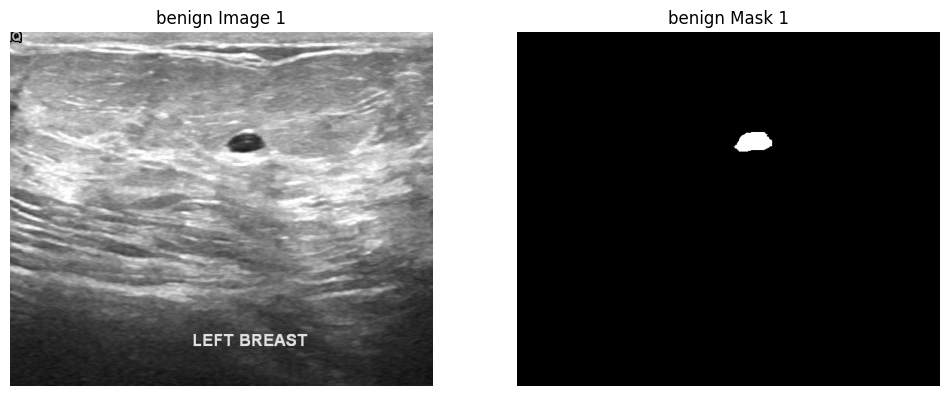

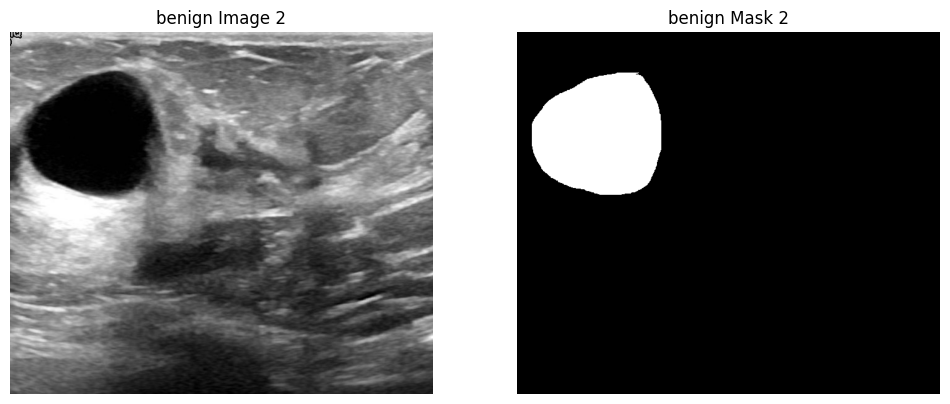

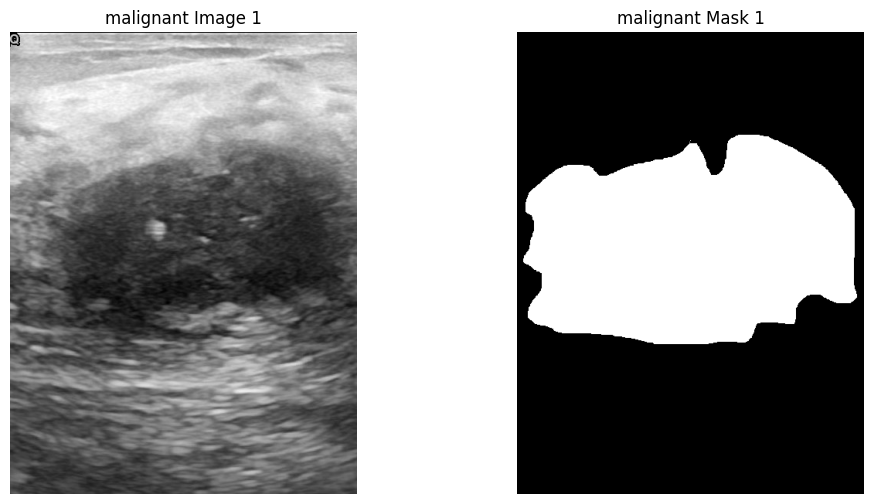

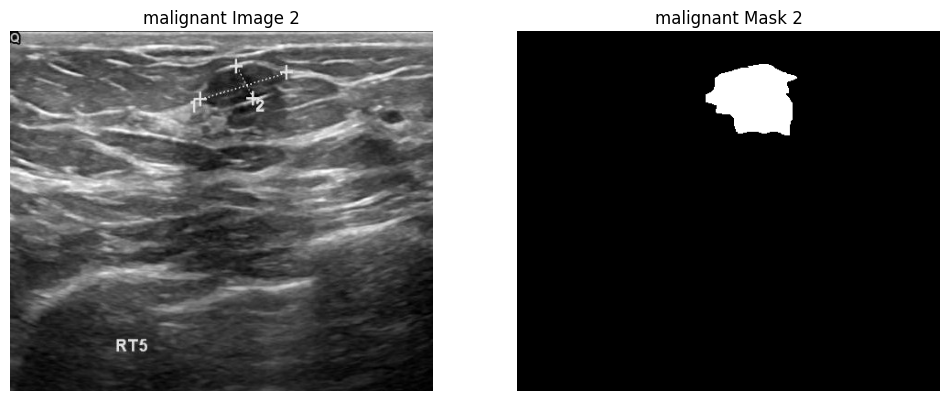

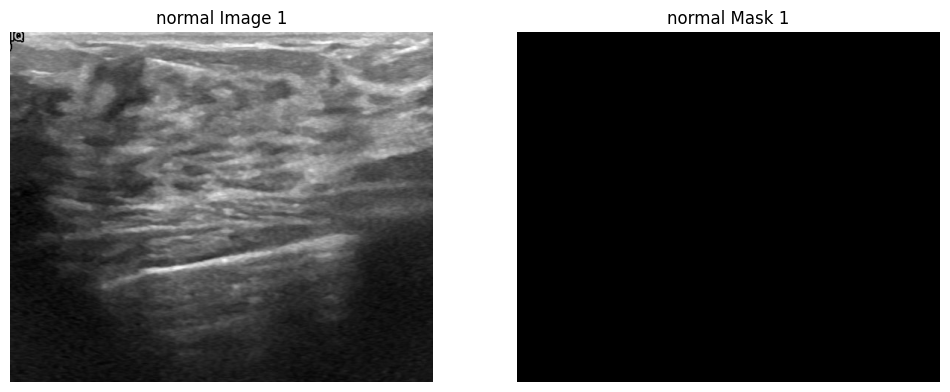

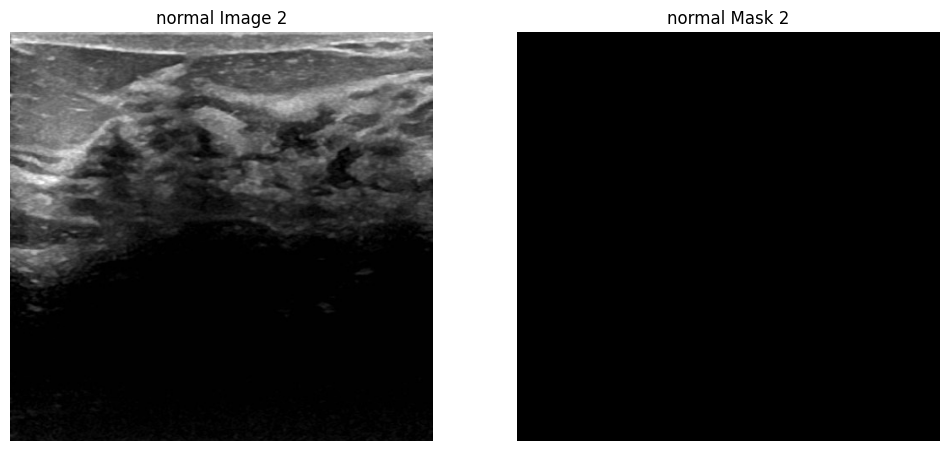

In [24]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Define the base directory path
base_dir = 'Dataset_BUSI_with_GT'

# Define a function to visualize images and masks
def visualize_images(base_dir, categories):
    for category in categories:
        # Get all image and mask file paths
        image_files = sorted([f for f in os.listdir(os.path.join(base_dir, category)) if f.endswith('.png') and not f.endswith('_mask.png')])
        mask_files = sorted([f for f in os.listdir(os.path.join(base_dir, category)) if f.endswith('_mask.png')])

        # Display first 2 images and masks
        for i in range(2):
            image_path = os.path.join(base_dir, category, image_files[i])
            mask_path = os.path.join(base_dir, category, mask_files[i])

            # Load images
            image = Image.open(image_path)
            mask = Image.open(mask_path)

            # Plot images
            plt.figure(figsize=(12, 6))

            # Plot original image
            plt.subplot(1, 2, 1)
            plt.imshow(image, cmap='gray')
            plt.title(f'{category} Image {i+1}')
            plt.axis('off')

            # Plot mask
            plt.subplot(1, 2, 2)
            plt.imshow(mask, cmap='gray')
            plt.title(f'{category} Mask {i+1}')
            plt.axis('off')

            plt.show()

# Define the categories
categories = ['benign', 'malignant', 'normal']

# Visualize images and masks
visualize_images(base_dir, categories)


##3. Data annotation for YOLOv8

From here I must obtain from all the images that carry `*_mask*.png` a file of annotations `.txt` in format YOLO. the class_index is given by the subdirectory that hangs from `Dataset_BUSI_with_GT`:

```
Dataset_BUSI_with_GT
├── benign
    |- benign (1).png
    |- begnign (1)_mask.png
    |- etc
├── malignant
└── normal
```

### Ultralytics YOLO format:

The dataset label format used for training YOLO segmentation models is as follows:


- One text file per image: Each image in the dataset has a corresponding text file with the same name as the image file and the ".txt" extension.
- One row per object: Each row in the text file corresponds to one object instance in the image.
- Object information per row: Each row contains the following information about the object instance:
- Object class index: An integer representing the class of the object (e.g., 0 for person, 1 for car, etc.).
- Object bounding coordinates: The bounding coordinates around the mask area, normalized to be between 0 and 1.


The format for a single row in the segmentation dataset file is as follows:

```<class-index> <x1> <y1> <x2> <y2> ... <xn> <yn>```


In this format, `<class-index>` is the index of the class for the object, and `<x1> <y1> <x2> <y2> ... <xn> <yn>` are the bounding coordinates of the object's segmentation mask. The coordinates are separated by spaces.

Here is an example of the YOLO dataset format for a single image with two objects made up of a 3-point segment and a 5-point segment.

```
0 0.681 0.485 0.670 0.487 0.676 0.487
1 0.504 0.000 0.501 0.004 0.498 0.004 0.493 0.010 0.492 0.0104
```

---
**import libraries**

---

In [40]:
import os
import cv2
import numpy as np

---
**Define normalize_coordinates Function**

---

In [41]:
def normalize_coordinates(coords, width, height):
    """Normalize coordinates to YOLO format (0 to 1)."""
    return [(x / width, y / height) for x, y in coords]

This function normalizes coordinates to YOLO format (0 to 1) based on the width and height of the image.

---
**Define get_object_boundaries Function**

---

In [42]:
def get_object_boundaries(mask_path):
    """Extract object boundaries from mask image."""
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    boundaries = [contour.squeeze(1).tolist() for contour in contours if len(contour) >= 3]  # Keep only contours with at least 3 points
    return boundaries, mask.shape[1], mask.shape[0]


This function extracts object boundaries from a mask image using OpenCV.

---
**Define save_annotations Function**

---

In [43]:
def save_annotations(image_name, annotations, output_dir):
    """Save annotations in YOLO format to a text file."""
    txt_path = os.path.join(output_dir, image_name.replace('.png', '.txt'))
    with open(txt_path, 'w') as file:
        for annotation in annotations:
            class_idx, boundary = annotation
            boundary_str = ' '.join([f'{x} {y}' for x, y in boundary])
            file.write(f'{class_idx} {boundary_str}\n')


This function saves the annotations in YOLO format to a text file.



---
**Define process_dataset Function**

---

In [48]:
def process_dataset(image_dir, label_dir, output_dir, class_idx):
    """Process the dataset and generate YOLO annotation files."""
    if not os.path.isdir(label_dir):
        raise NotADirectoryError(f'{label_dir} is not a directory.')

    os.makedirs(output_dir, exist_ok=True)

    # Dictionary to hold all annotations for each image
    image_annotations = {}

    for mask_file in os.listdir(label_dir):
        mask_path = os.path.join(label_dir, mask_file)
        if not os.path.isfile(mask_path):
            continue

        if '_mask' in mask_file and mask_file.endswith('.png'):
            boundaries, width, height = get_object_boundaries(mask_path)
            annotations = [(class_idx, normalize_coordinates(boundary, width, height)) for boundary in boundaries]
            image_name = mask_file.split('_mask')[0] + '.png'

            if image_name not in image_annotations:
                image_annotations[image_name] = []

            image_annotations[image_name].extend(annotations)

    # Save all collected annotations
    for image_name, annotations in image_annotations.items():
        save_annotations(image_name, annotations, output_dir)

This function processes the dataset and generates YOLO annotation files.

---
**Define Paths and Class Indices**

---

In [45]:
# Define paths
base_dir = 'Dataset_BUSI_with_GT'
output_base_dir = base_dir

# Define class indices
class_indices = {'benign': 0, 'malignant': 1, 'normal': 2}


In this cell, we define the base directory for the dataset and the class indices.



---
**Process Each Class in the Dataset**

---

In [49]:
# Process each class
for class_name, class_idx in class_indices.items():
    # Paths for images and labels
    image_dir = os.path.join(base_dir, class_name)
    label_dir = os.path.join(base_dir, class_name)
    output_dir = os.path.join(output_base_dir, class_name)

    process_dataset(image_dir, label_dir, output_dir, class_idx)

print("Annotations created successfully")


Annotations created successfully


This cell processes each class in the dataset by calling the process_dataset function.



---
**List type of files in subdirectories**

---

In [50]:
!tree --dirsfirst -L 2  "Dataset_BUSI_with_GT"| head -n 10

Dataset_BUSI_with_GT
├── benign
│   ├── benign (100)_mask_1.png
│   ├── benign (100)_mask.png
│   ├── benign (100).png
│   ├── benign (100).txt
│   ├── benign (101)_mask.png
│   ├── benign (101).png
│   ├── benign (101).txt
│   ├── benign (102)_mask.png


In the case where there are no annotations for an image, it is correct that the .txt annotation file is empty, since there are no objects to annotate. However, if you want every .txt file to have at least the class of the image, even when there are no objects detected, you can modify the script to include an entry in the text file for the class, albeit without coordinates.



## 4. Data Preparation

We want split our data in train, val y test data.

In [51]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Define the paths
original_dataset_dir = 'Dataset_BUSI_with_GT'
base_dir = 'BreastUltraSoundImages'

# Define new paths for train, val, and test
image_dir = os.path.join(base_dir, 'images')
label_dir = os.path.join(base_dir, 'labels')
train_image_dir = os.path.join(image_dir, 'train')
val_image_dir = os.path.join(image_dir, 'val')
test_image_dir = os.path.join(image_dir, 'test')
train_label_dir = os.path.join(label_dir, 'train')
val_label_dir = os.path.join(label_dir, 'val')
test_label_dir = os.path.join(label_dir, 'test')

# Create directories if they do not exist
os.makedirs(train_image_dir, exist_ok=True)
os.makedirs(val_image_dir, exist_ok=True)
os.makedirs(test_image_dir, exist_ok=True)
os.makedirs(train_label_dir, exist_ok=True)
os.makedirs(val_label_dir, exist_ok=True)
os.makedirs(test_label_dir, exist_ok=True)

# List the classes
classes = ['benign', 'malignant', 'normal']

# Function to copy images and corresponding labels
def copy_images_and_labels(class_name, src_image_dir, src_label_dir, train_image_dst, val_image_dst, test_image_dst,
                           train_label_dst, val_label_dst, test_label_dst, train_ratio=0.7, val_ratio=0.15):
    # List all images in the class
    images = os.listdir(src_image_dir)
    images = [img for img in images if img.endswith('.png')]  # Adjust the extension if needed
    image_paths = [os.path.join(src_image_dir, img) for img in images]
    label_paths = [os.path.join(src_label_dir, img.replace('.png', '.txt')) for img in images]  # Adjust the mask naming convention

    # Split into train, val, and test
    train_images, temp_images, train_labels, temp_labels = train_test_split(
        image_paths, label_paths, train_size=train_ratio, random_state=42)
    val_images, test_images, val_labels, test_labels = train_test_split(
        temp_images, temp_labels, test_size=val_ratio / (val_ratio + (1 - train_ratio)), random_state=42)

    # Copy images and labels
    for img, label in zip(train_images, train_labels):
        if os.path.exists(label):  # Ensure the label file exists before copying
            shutil.copy(img, train_image_dst)
            shutil.copy(label, train_label_dst)

    for img, label in zip(val_images, val_labels):
        if os.path.exists(label):  # Ensure the label file exists before copying
            shutil.copy(img, val_image_dst)
            shutil.copy(label, val_label_dst)

    for img, label in zip(test_images, test_labels):
        if os.path.exists(label):  # Ensure the label file exists before copying
            shutil.copy(img, test_image_dst)
            shutil.copy(label, test_label_dst)

# Copy images and labels for each class
for class_name in classes:
    src_image_dir = os.path.join(original_dataset_dir,class_name)
    src_label_dir = os.path.join(original_dataset_dir, class_name)  # Adjust if masks are in a different directory
    copy_images_and_labels(class_name, src_image_dir, src_label_dir, train_image_dir, val_image_dir, test_image_dir,
                           train_label_dir, val_label_dir, test_label_dir)

print("Dataset reorganized successfully")


Dataset reorganized successfully


In [53]:
!tree --dirsfirst -L 4 --filelimit 10 "BreastUltraSoundImages"

BreastUltraSoundImages
├── images
│   ├── test  [80 entries exceeds filelimit, not opening dir]
│   ├── train  [550 entries exceeds filelimit, not opening dir]
│   └── val  [150 entries exceeds filelimit, not opening dir]
└── labels
    ├── test  [80 entries exceeds filelimit, not opening dir]
    ├── train  [550 entries exceeds filelimit, not opening dir]
    └── val  [150 entries exceeds filelimit, not opening dir]

8 directories, 0 files


---
**Visualiza 4 imagenes y sus mascaras correspondientes para test, train y val.**

---

In [ ]:
!pip install -q opencv-python matplotlib

Train samples 



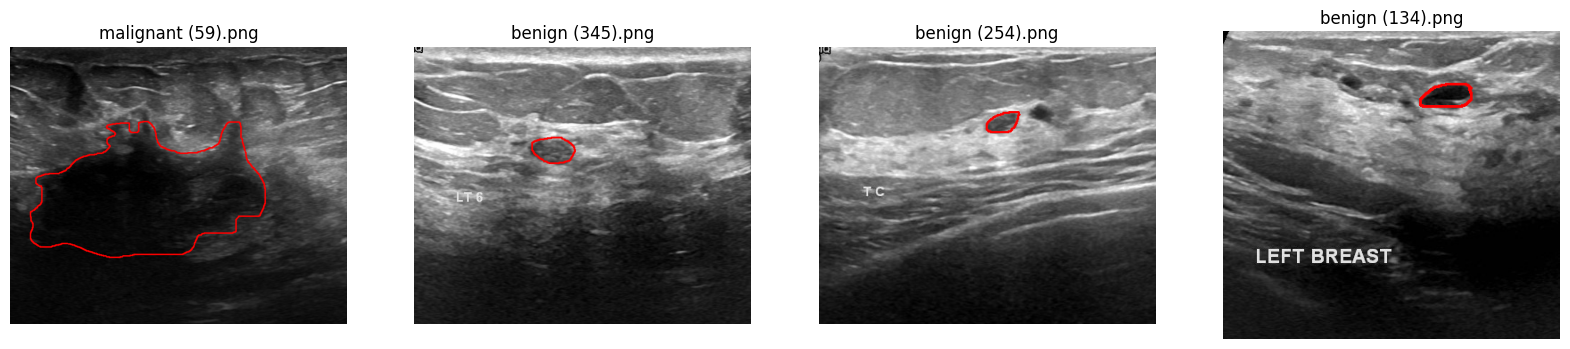


 Test samples 



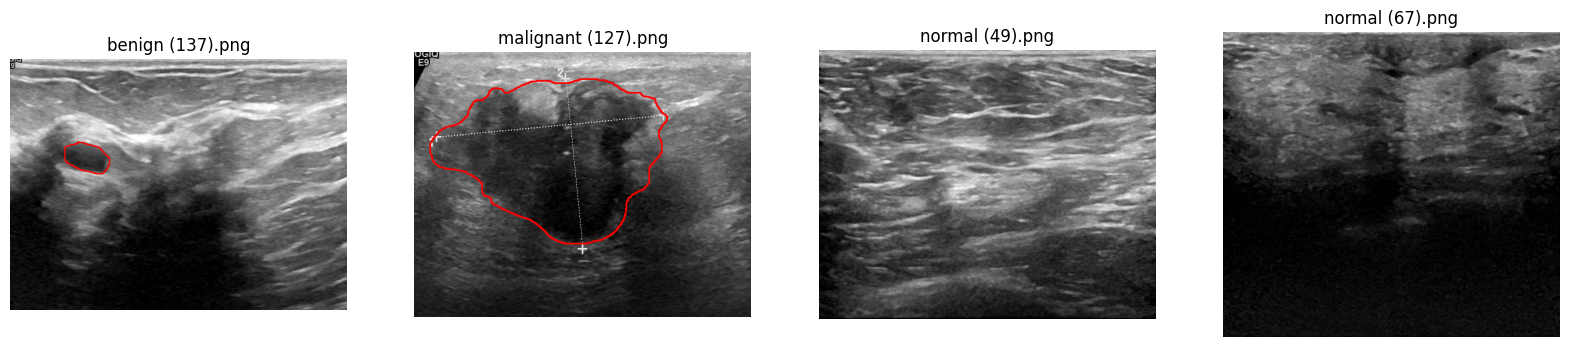


 Validation samples 



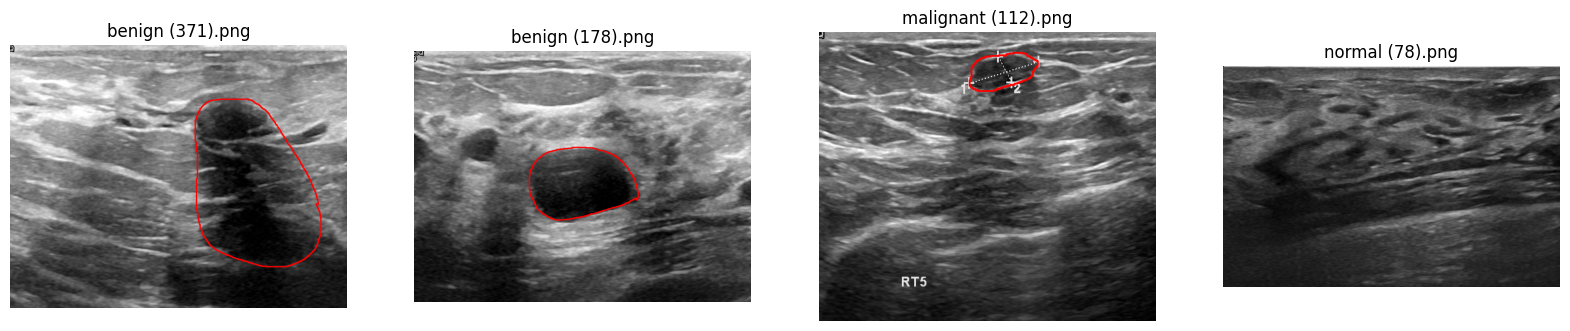

In [67]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np # Import numpy

def load_annotations(label_path):
    """Load annotations from a YOLO format text file."""
    annotations = []
    with open(label_path, 'r') as file:
        for line in file:
            parts = line.strip().split()
            if len(parts) < 3:
                continue  # Skip lines that do not have at least class_id and one pair of coordinates
            class_id = int(parts[0])
            coords = [float(coord) for coord in parts[1:]]
            if len(coords) % 2 != 0:
                continue  # Skip lines with an odd number of coordinates
            annotations.append((class_id, coords))
    return annotations

def draw_annotations(image, annotations):
    """Draw annotations on an image."""
    height, width, _ = image.shape
    for annotation in annotations:
        class_id, coords = annotation
        points = [(int(coords[i] * width), int(coords[i + 1] * height)) for i in range(0, len(coords), 2)]
        points = np.array(points, np.int32)
        # Reshape to a 2D array with at least 2 columns
        points = points.reshape((-1, 2))  # Change from (-1, 1) to (-1, 2)
        cv2.polylines(image, [points], isClosed=True, color=(255, 0, 0), thickness=2)
    return image

def visualize_samples(images_dir, labels_dir, sample_size=4):
    """Visualize sample images with annotations in a grid."""
    image_files = os.listdir(images_dir)[:sample_size]

    # Handle the case when sample_size is 1
    if sample_size == 1:
        fig, ax = plt.subplots(figsize=(5, 5))  # Create a single Axes object
        axes = [ax]  # Wrap it in a list for consistency
    else:
        fig, axes = plt.subplots(1, sample_size, figsize=(20, 5))

    for i, image_file in enumerate(image_files):
        image_path = os.path.join(images_dir, image_file)
        label_path = os.path.join(labels_dir, image_file.replace('.png', '.txt'))

        # Load and process the image within the loop
        image = cv2.imread(image_path) # Moved image loading inside the loop
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        if os.path.exists(label_path):
            annotations = load_annotations(label_path)
            image = draw_annotations(image, annotations)

        axes[i].imshow(image)
        axes[i].axis('off')
        axes[i].set_title(image_file)

    plt.show()

# Define paths
base_dir = 'BreastUltraSoundImages'

# Visualize samples for train, test, and val sets
print("Train samples \n")
visualize_samples(os.path.join(base_dir, 'images/train'), os.path.join(base_dir, 'labels/train'))

print("\n Test samples \n")
visualize_samples(os.path.join(base_dir, 'images/test'), os.path.join(base_dir, 'labels/test'))

print("\n Validation samples \n")
visualize_samples(os.path.join(base_dir, 'images/val'), os.path.join(base_dir, 'labels/val'))

---
**Display an example with more than one annotation**

---

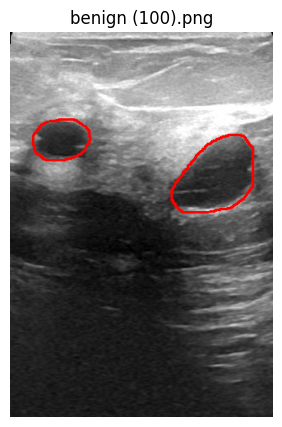

In [71]:
# Define paths
base_dir = 'BreastUltraSoundImages'
image_name = 'benign (100).png'

# Display the specific image
image_path = os.path.join(base_dir, 'images/train', image_name)
label_path = os.path.join(base_dir, 'labels/train', image_name.replace('.png', '.txt'))
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
if os.path.exists(label_path):
    annotations = load_annotations(label_path)
    image = draw_annotations(image, annotations)
plt.figure(figsize=(5,5))
plt.imshow(image)
plt.axis('off')
plt.title(image_name)
plt.show()

## 5. Train the model for Segmenting Breast Ultrasound images

---
**Install ultralytics**

---

In [72]:
!pip install -q ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 824.8/824.8 kB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 14.0 MB/s eta 0:00:00


---
**Create yaml archive**

---

In [73]:
#create yaml archive

import yaml

# Content of the YAML file
data = {
    'path': '../BreastUltraSoundImages', # Path to the dataset directory
    'train': 'images/train',
    'val': 'images/val',
    'test': 'images/test',
    'nc': 3,  # Number of classes (benign, malignant, normal)
    'names': {
        0: 'benign',
        1: 'malignant',
        2: 'normal'
    },
}

# Create and write to data.yaml
with open('data.yaml', 'w') as file:
    yaml.dump(data, file, default_flow_style=False, allow_unicode=True)

print("Archivo data.yaml creado exitosamente.")

Archivo data.yaml creado exitosamente.


---
**Training**

---

In [74]:
from ultralytics import YOLO

# Load the YOLOv8 model for segmentation
model = YOLO('yolov8n-seg.pt')

# Training the model
model.train(data='data.yaml', epochs=100, imgsz=640)


100%|██████████| 6.74M/6.74M [00:00<00:00, 118MB/s]


Ultralytics YOLOv8.2.64 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True,

100%|██████████| 755k/755k [00:00<00:00, 22.2MB/s]


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 6.25M/6.25M [00:00<00:00, 109MB/s]


AMP: checks passed ✅


train: Scanning /content/BreastUltraSoundImages/labels/train... 550 images, 95 backgrounds, 0 corrupt: 100%|██████████| 550/550 [00:02<00:00, 251.34it/s]


train: New cache created: /content/BreastUltraSoundImages/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/BreastUltraSoundImages/labels/val... 150 images, 24 backgrounds, 0 corrupt: 100%|██████████| 150/150 [00:00<00:00, 210.13it/s]

val: New cache created: /content/BreastUltraSoundImages/labels/val.cache


Plotting labels to runs/segment/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/segment/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/100      3.02G      1.585       3.33      3.546      1.598          9        640: 100%|██████████| 35/35 [00:22<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.09it/s]

                   all        150        129     0.0155      0.799      0.277      0.153      0.012      0.663      0.273      0.165



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.81G      1.381      2.388      2.648      1.447         12        640: 100%|██████████| 35/35 [00:14<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.13s/it]

                   all        150        129      0.258      0.181      0.191      0.103      0.263      0.185      0.195      0.106



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.82G      1.412      2.302      2.496      1.491          8        640: 100%|██████████| 35/35 [00:21<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.15it/s]

                   all        150        129      0.296      0.264       0.22      0.121      0.307      0.262      0.197      0.101



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.71G      1.403      2.229      2.306      1.482         10        640: 100%|██████████| 35/35 [00:17<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.71it/s]

                   all        150        129      0.798      0.239      0.249      0.143      0.798      0.239      0.248      0.145



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.79G      1.395       2.25      2.211      1.464         12        640: 100%|██████████| 35/35 [00:21<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.26it/s]

                   all        150        129      0.406      0.394      0.378      0.228      0.402       0.39      0.376      0.238



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.69G       1.35      2.175      2.002      1.433          9        640: 100%|██████████| 35/35 [00:18<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.16s/it]

                   all        150        129      0.393      0.284      0.273      0.172      0.388      0.272      0.277      0.174



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.77G      1.334      2.147      1.887      1.424         11        640: 100%|██████████| 35/35 [00:14<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.28it/s]

                   all        150        129      0.474      0.451      0.442      0.247      0.467       0.44      0.433      0.256



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.69G      1.337      2.189      1.904      1.426         12        640: 100%|██████████| 35/35 [00:16<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.19it/s]

                   all        150        129      0.659      0.419      0.495      0.288      0.659      0.419      0.496      0.283



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.69G      1.333       2.07      1.807      1.408         11        640: 100%|██████████| 35/35 [00:16<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.19it/s]

                   all        150        129      0.543      0.448      0.465      0.281       0.57      0.466      0.487      0.293



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/100       2.8G      1.258      2.044      1.695      1.368          8        640: 100%|██████████| 35/35 [00:16<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.11it/s]

                   all        150        129      0.361      0.636      0.479      0.277      0.367      0.636      0.481      0.287



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.77G      1.277      2.068      1.698      1.391          8        640: 100%|██████████| 35/35 [00:16<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.05it/s]

                   all        150        129      0.539      0.476      0.521      0.324      0.537      0.476       0.52      0.316



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.75G      1.244      1.908       1.56      1.351         11        640: 100%|██████████| 35/35 [00:16<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.13it/s]

                   all        150        129      0.519      0.612      0.613      0.364      0.531      0.586       0.59      0.363



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.78G       1.27      2.064      1.558      1.372         14        640: 100%|██████████| 35/35 [00:16<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.02it/s]

                   all        150        129      0.523      0.501      0.565      0.353       0.66      0.454      0.559      0.346



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.68G      1.203      1.938      1.495      1.307         15        640: 100%|██████████| 35/35 [00:17<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.24it/s]

                   all        150        129      0.536       0.58      0.504      0.303      0.541       0.58      0.502      0.313



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.78G      1.234      2.051      1.545      1.347         15        640: 100%|██████████| 35/35 [00:16<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.51it/s]

                   all        150        129      0.715      0.518      0.624      0.375      0.569      0.681      0.611      0.378



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.74G      1.199      1.968      1.478      1.323         10        640: 100%|██████████| 35/35 [00:19<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.22it/s]

                   all        150        129      0.671       0.61      0.667      0.402        0.6      0.656      0.666      0.419



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.81G      1.183      1.954      1.436      1.286         11        640: 100%|██████████| 35/35 [00:17<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.05it/s]

                   all        150        129       0.55      0.581       0.58      0.378      0.575      0.586      0.589      0.381



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/100       2.7G      1.135      1.888      1.371      1.273          9        640: 100%|██████████| 35/35 [00:15<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.98it/s]

                   all        150        129      0.671      0.511      0.567      0.371      0.637      0.505       0.56      0.362



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.68G      1.176      1.881      1.359      1.294          6        640: 100%|██████████| 35/35 [00:15<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.03it/s]

                   all        150        129      0.698      0.528       0.62      0.398      0.698      0.528      0.616      0.379



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.82G      1.139      1.903      1.362      1.301         11        640: 100%|██████████| 35/35 [00:17<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.32it/s]

                   all        150        129      0.693      0.547      0.653      0.426      0.693      0.547       0.65      0.421



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.76G      1.132      1.879      1.298       1.27         10        640: 100%|██████████| 35/35 [00:16<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.38it/s]

                   all        150        129      0.726      0.583      0.647      0.393      0.704      0.572      0.634      0.381



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.69G      1.144      1.894      1.312      1.287          8        640: 100%|██████████| 35/35 [00:16<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.20it/s]

                   all        150        129      0.628      0.642      0.643      0.372        0.6       0.63      0.633      0.368



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.68G      1.117      1.826      1.228      1.257         12        640: 100%|██████████| 35/35 [00:16<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.26it/s]

                   all        150        129      0.727      0.494      0.559      0.362      0.608      0.529      0.557      0.342



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/100       2.8G      1.167      1.932      1.308      1.309         10        640: 100%|██████████| 35/35 [00:16<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.27it/s]

                   all        150        129      0.675      0.556      0.618      0.384      0.692      0.598       0.63      0.378



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.69G      1.127      1.852      1.318      1.279         13        640: 100%|██████████| 35/35 [00:16<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.07it/s]

                   all        150        129      0.642      0.603      0.634      0.394      0.622      0.596      0.615      0.382



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.68G      1.139      1.831        1.3      1.277         11        640: 100%|██████████| 35/35 [00:16<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.31it/s]

                   all        150        129      0.596      0.619      0.581      0.369      0.674      0.572      0.594       0.36



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.71G      1.105      1.824      1.281      1.267          6        640: 100%|██████████| 35/35 [00:16<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.25it/s]

                   all        150        129      0.617      0.654      0.658      0.374      0.624      0.659      0.661      0.396



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.76G      1.064      1.803      1.211      1.227          8        640: 100%|██████████| 35/35 [00:16<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.42it/s]

                   all        150        129      0.606      0.621      0.698      0.437      0.623      0.634       0.71      0.432



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.79G      1.073      1.822       1.25      1.239          9        640: 100%|██████████| 35/35 [00:20<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.20it/s]

                   all        150        129      0.763      0.628      0.701      0.415      0.705      0.645      0.685      0.409



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/100       2.8G      1.044      1.747      1.133      1.214          9        640: 100%|██████████| 35/35 [00:15<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.00it/s]

                   all        150        129      0.773      0.557      0.662      0.408      0.764      0.552      0.664      0.403



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.81G      1.089      1.801       1.19      1.254         11        640: 100%|██████████| 35/35 [00:15<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]

                   all        150        129      0.783      0.561      0.698      0.443      0.594        0.7      0.691      0.425



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/100       2.8G      1.044       1.76      1.164      1.193         14        640: 100%|██████████| 35/35 [00:14<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.54it/s]

                   all        150        129       0.66      0.687      0.692       0.42      0.666      0.692      0.696      0.423



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.79G      1.045      1.747      1.126      1.233         10        640: 100%|██████████| 35/35 [00:14<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.56it/s]

                   all        150        129      0.669      0.534      0.623      0.387      0.584      0.626      0.638      0.374



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.77G      1.015      1.702      1.094      1.193          9        640: 100%|██████████| 35/35 [00:15<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.54it/s]

                   all        150        129      0.653      0.599       0.64       0.42      0.674      0.618      0.669      0.418



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.69G      1.055      1.706      1.094      1.215          8        640: 100%|██████████| 35/35 [00:14<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.18it/s]

                   all        150        129      0.666      0.665      0.692      0.412      0.682      0.678      0.704      0.408



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.78G      1.065      1.771      1.155      1.239          8        640: 100%|██████████| 35/35 [00:14<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.20it/s]

                   all        150        129      0.786      0.629      0.709      0.439      0.797      0.647      0.718      0.447



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.82G       1.02      1.813      1.127      1.221         13        640: 100%|██████████| 35/35 [00:13<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.18it/s]

                   all        150        129      0.706      0.607      0.648        0.4      0.706      0.607       0.65      0.396



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.71G     0.9892      1.667      1.016      1.191         13        640: 100%|██████████| 35/35 [00:13<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.15it/s]

                   all        150        129      0.765       0.57      0.695      0.445      0.617      0.706      0.691      0.421



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/100       2.8G      1.014      1.742      1.061      1.209          8        640: 100%|██████████| 35/35 [00:13<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.17it/s]

                   all        150        129      0.598      0.493       0.58      0.385      0.604      0.524       0.59      0.365



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/100       2.8G      1.021      1.693       1.06        1.2         13        640: 100%|██████████| 35/35 [00:13<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.25it/s]

                   all        150        129      0.728      0.637      0.681      0.448      0.728      0.637      0.683      0.437



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.78G     0.9462       1.63       1.03      1.176         11        640: 100%|██████████| 35/35 [00:13<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.13it/s]

                   all        150        129      0.781      0.598       0.71      0.447      0.781      0.598      0.707      0.439



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.71G     0.9721      1.651     0.9915      1.184         16        640: 100%|██████████| 35/35 [00:14<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.14it/s]

                   all        150        129      0.691      0.635      0.708      0.449      0.696       0.64      0.727      0.438



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/100       2.8G     0.9805      1.613     0.9722      1.174         12        640: 100%|██████████| 35/35 [00:18<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.11it/s]

                   all        150        129      0.691      0.697      0.727      0.493      0.702      0.694      0.738      0.466



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/100       2.8G     0.9647      1.621     0.9432      1.161         11        640: 100%|██████████| 35/35 [00:15<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.23it/s]

                   all        150        129      0.668      0.712      0.755      0.499      0.668      0.712      0.749      0.474



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.77G     0.9668      1.632     0.9802      1.153         16        640: 100%|██████████| 35/35 [00:14<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.32it/s]

                   all        150        129      0.738       0.67      0.737      0.474      0.738       0.67      0.727      0.458



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/100       2.8G     0.9582      1.579     0.9702      1.165          9        640: 100%|██████████| 35/35 [00:14<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.30it/s]

                   all        150        129      0.699      0.635      0.706      0.453      0.703      0.641      0.712      0.445



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.71G      0.982      1.685     0.9869      1.155         10        640: 100%|██████████| 35/35 [00:15<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]

                   all        150        129      0.697      0.759      0.749      0.469      0.702      0.764      0.751      0.455



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.81G     0.9431       1.54     0.8941      1.157         10        640: 100%|██████████| 35/35 [00:15<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.55it/s]

                   all        150        129      0.676      0.653      0.718      0.448      0.772      0.604      0.715      0.435



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/100       2.8G     0.9629      1.608     0.9493      1.159          8        640: 100%|██████████| 35/35 [00:16<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.68it/s]

                   all        150        129      0.717      0.671      0.731      0.493      0.717      0.671      0.736      0.475



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/100       2.8G      0.948      1.609     0.9542       1.15         10        640: 100%|██████████| 35/35 [00:21<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.48it/s]

                   all        150        129      0.708      0.755       0.75      0.493      0.708      0.755      0.751      0.475



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.68G      0.917      1.535     0.8756      1.118         11        640: 100%|██████████| 35/35 [00:17<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.83it/s]

                   all        150        129      0.648       0.71      0.696      0.436       0.65      0.724      0.697       0.43



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.68G     0.9532      1.561     0.8803      1.146         11        640: 100%|██████████| 35/35 [00:17<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.38it/s]

                   all        150        129      0.676      0.706      0.762      0.476      0.664      0.696      0.744      0.468



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.68G     0.9062      1.578     0.8582      1.131         12        640: 100%|██████████| 35/35 [00:15<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.25it/s]

                   all        150        129      0.796      0.701        0.8      0.504      0.796      0.701      0.804      0.496



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/100       2.8G     0.9046      1.565     0.8875      1.117         12        640: 100%|██████████| 35/35 [00:16<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.07it/s]

                   all        150        129      0.737       0.66      0.725      0.474      0.737       0.66      0.725      0.459



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.79G     0.9126      1.529     0.8502       1.12         10        640: 100%|██████████| 35/35 [00:20<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.17it/s]

                   all        150        129      0.793      0.598      0.696      0.455      0.793      0.598      0.708      0.447



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.78G     0.8796      1.483     0.8121      1.095         17        640: 100%|██████████| 35/35 [00:14<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.21it/s]

                   all        150        129      0.671      0.708      0.728      0.475      0.689      0.707       0.73      0.457



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.68G     0.9111      1.574     0.8674      1.137         13        640: 100%|██████████| 35/35 [00:14<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.56it/s]

                   all        150        129      0.697      0.654      0.697      0.443      0.701      0.676      0.697      0.425



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.76G     0.9041      1.527     0.8628       1.13          9        640: 100%|██████████| 35/35 [00:14<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]

                   all        150        129      0.682       0.57      0.708      0.466      0.632      0.601      0.703      0.433



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.79G     0.8616      1.508     0.8082      1.107          9        640: 100%|██████████| 35/35 [00:14<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.41it/s]

                   all        150        129      0.778      0.631      0.755      0.481      0.778      0.631      0.752      0.461



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.68G     0.8655      1.448     0.7804      1.097         12        640: 100%|██████████| 35/35 [00:15<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.27it/s]

                   all        150        129      0.696      0.689      0.757      0.489      0.696      0.689      0.758      0.477



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.69G     0.8829      1.475     0.8065      1.102         15        640: 100%|██████████| 35/35 [00:14<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.18it/s]

                   all        150        129      0.712       0.68      0.745       0.48      0.731        0.7      0.755      0.477



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.76G     0.8492      1.479     0.7806      1.106         10        640: 100%|██████████| 35/35 [00:14<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.25it/s]

                   all        150        129        0.7      0.752      0.772      0.485      0.694      0.746      0.748       0.47



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     63/100       2.8G     0.8352      1.451     0.7927      1.083         16        640: 100%|██████████| 35/35 [00:14<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.59it/s]

                   all        150        129      0.702      0.717      0.769      0.486      0.721      0.735      0.786      0.477



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     64/100       2.8G     0.8531      1.483     0.7936      1.101          7        640: 100%|██████████| 35/35 [00:14<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.73it/s]

                   all        150        129      0.704      0.688      0.738      0.496      0.704      0.688      0.746      0.471



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.71G     0.8575      1.434     0.7875      1.094         13        640: 100%|██████████| 35/35 [00:15<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.91it/s]

                   all        150        129      0.733      0.724      0.766      0.484      0.733      0.724      0.773      0.465



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     66/100       2.8G     0.8425      1.502       0.78      1.071          9        640: 100%|██████████| 35/35 [00:15<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.82it/s]

                   all        150        129      0.695      0.751      0.745      0.484      0.712       0.77      0.782      0.479



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.69G     0.8051      1.417     0.7126      1.059         10        640: 100%|██████████| 35/35 [00:15<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.66it/s]

                   all        150        129      0.776      0.726      0.769      0.497      0.776      0.726      0.772      0.492



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.74G     0.8252       1.47     0.7437      1.075         12        640: 100%|██████████| 35/35 [00:15<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.33it/s]

                   all        150        129      0.859      0.652      0.793      0.501      0.865      0.657      0.807      0.485



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.69G     0.8063      1.455     0.7346      1.066          9        640: 100%|██████████| 35/35 [00:18<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.31it/s]

                   all        150        129      0.815      0.718      0.792       0.52      0.815      0.718       0.79      0.498



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.68G     0.8241      1.448     0.7391      1.051         12        640: 100%|██████████| 35/35 [00:16<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.26it/s]

                   all        150        129      0.831      0.749      0.807      0.527      0.831      0.749      0.813      0.516



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.76G      0.789      1.373     0.7149      1.068          8        640: 100%|██████████| 35/35 [00:15<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.21it/s]

                   all        150        129      0.766      0.788      0.823      0.546      0.766      0.788      0.826      0.518



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.76G     0.7901      1.396     0.7102      1.077         15        640: 100%|██████████| 35/35 [00:17<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.28it/s]

                   all        150        129      0.774      0.692      0.796      0.524      0.774      0.692      0.799        0.5



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     73/100      2.69G     0.8047      1.369     0.7332      1.073         11        640: 100%|██████████| 35/35 [00:16<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.20it/s]

                   all        150        129      0.752      0.733      0.779      0.509      0.826      0.661      0.777      0.481



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.68G     0.7879      1.418     0.7257      1.067          9        640: 100%|██████████| 35/35 [00:16<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.22it/s]

                   all        150        129      0.704      0.724      0.732      0.481      0.713      0.733      0.748      0.459



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.81G     0.8022      1.414     0.7099      1.069          8        640: 100%|██████████| 35/35 [00:16<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.46it/s]

                   all        150        129      0.734      0.811       0.81      0.526      0.734      0.811      0.809      0.504



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.76G     0.8117      1.423     0.7078      1.078         13        640: 100%|██████████| 35/35 [00:16<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.25it/s]

                   all        150        129      0.766      0.785      0.812      0.518      0.759      0.778      0.793      0.488



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.71G     0.8341      1.448     0.7304      1.083          7        640: 100%|██████████| 35/35 [00:17<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.08it/s]

                   all        150        129      0.761      0.654      0.755      0.504      0.761      0.654      0.758      0.485



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.82G     0.8143      1.425     0.7192       1.08         12        640: 100%|██████████| 35/35 [00:16<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.14it/s]

                   all        150        129      0.777      0.746      0.793      0.534      0.784      0.751        0.8      0.521



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.68G      0.722      1.316     0.6451      1.038         10        640: 100%|██████████| 35/35 [00:16<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.25it/s]

                   all        150        129      0.791      0.782      0.807      0.521      0.791      0.782       0.81        0.5



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.71G      0.768      1.331     0.6498      1.049          7        640: 100%|██████████| 35/35 [00:16<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.31it/s]

                   all        150        129      0.829      0.746      0.818      0.531      0.829      0.746       0.82       0.51



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     81/100       2.8G     0.7527      1.362     0.6432      1.049         12        640: 100%|██████████| 35/35 [00:16<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.21it/s]

                   all        150        129      0.814      0.741      0.806      0.515       0.82      0.747      0.817      0.507



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.82G     0.7348      1.312     0.6354      1.026         12        640: 100%|██████████| 35/35 [00:16<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.32it/s]

                   all        150        129       0.74      0.731      0.807      0.532      0.708      0.753      0.805      0.512



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     83/100      2.74G     0.7539      1.289     0.6386      1.034          8        640: 100%|██████████| 35/35 [00:16<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.34it/s]

                   all        150        129      0.782      0.756      0.801      0.514      0.782      0.756      0.795        0.5



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.69G      0.754       1.31     0.6562      1.046         10        640: 100%|██████████| 35/35 [00:16<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.31it/s]

                   all        150        129      0.822      0.705      0.764      0.494      0.822      0.705      0.767      0.483



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.78G     0.7397      1.338     0.6634       1.04          5        640: 100%|██████████| 35/35 [00:15<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.62it/s]

                   all        150        129      0.808      0.702      0.785      0.499      0.808      0.702      0.781      0.481



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.81G      0.735      1.296     0.6308      1.038         11        640: 100%|██████████| 35/35 [00:15<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.75it/s]

                   all        150        129       0.73      0.779      0.796      0.509       0.73      0.779      0.796      0.491



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.78G     0.7497      1.369     0.6548      1.049          9        640: 100%|██████████| 35/35 [00:15<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.79it/s]

                   all        150        129      0.748      0.773      0.801      0.514      0.748      0.773      0.804      0.503



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.68G     0.7065      1.283     0.6338       1.02          8        640: 100%|██████████| 35/35 [00:15<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.70it/s]

                   all        150        129      0.778      0.724      0.807      0.526      0.791      0.737       0.81      0.508



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.73G     0.7219      1.325     0.6135      1.024          9        640: 100%|██████████| 35/35 [00:14<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.59it/s]

                   all        150        129       0.85      0.678      0.805      0.514       0.85      0.678      0.804      0.494



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.77G      0.707      1.265     0.6132      1.022         12        640: 100%|██████████| 35/35 [00:15<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.15it/s]

                   all        150        129      0.813      0.726      0.802       0.52      0.813      0.726      0.801      0.502


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.78G     0.6118      1.177     0.5363     0.9926          7        640: 100%|██████████| 35/35 [00:18<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.32it/s]

                   all        150        129      0.743      0.736      0.767      0.502      0.749      0.742      0.777      0.477



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.67G     0.5968      1.099     0.4893     0.9786          5        640: 100%|██████████| 35/35 [00:14<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.19it/s]

                   all        150        129      0.773      0.766      0.776      0.506      0.783      0.772      0.786      0.481



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.67G     0.5914      1.087     0.4538     0.9707          3        640: 100%|██████████| 35/35 [00:15<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.28it/s]

                   all        150        129      0.824      0.717      0.769      0.504       0.83      0.722      0.781      0.487



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.78G     0.5953      1.105     0.4488     0.9746          5        640: 100%|██████████| 35/35 [00:15<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.87it/s]

                   all        150        129      0.847      0.707      0.764      0.496      0.854      0.712      0.777      0.483



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.67G     0.5707      1.042     0.4488     0.9505          6        640: 100%|██████████| 35/35 [00:14<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.15it/s]

                   all        150        129      0.809      0.704      0.776      0.502      0.809      0.704      0.778      0.481



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.67G     0.5685       1.07     0.4226      0.949          4        640: 100%|██████████| 35/35 [00:17<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.20it/s]

                   all        150        129      0.734      0.792       0.78      0.507       0.74      0.797      0.792      0.491



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.64G     0.5599      1.066     0.4292     0.9466          4        640: 100%|██████████| 35/35 [00:14<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.68it/s]

                   all        150        129      0.758      0.794      0.797      0.519      0.764      0.799      0.808      0.506



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.67G     0.5401      1.029     0.4272     0.9382          5        640: 100%|██████████| 35/35 [00:13<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]

                   all        150        129      0.735      0.805      0.798      0.525      0.741       0.81      0.811       0.51



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.67G       0.55      1.023     0.4027     0.9459          7        640: 100%|██████████| 35/35 [00:13<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.15it/s]

                   all        150        129      0.843      0.711      0.797      0.516       0.85      0.717      0.812      0.499



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.67G     0.5623      1.036     0.4222     0.9447          6        640: 100%|██████████| 35/35 [00:12<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.25it/s]

                   all        150        129      0.768       0.79      0.796      0.515      0.773      0.796      0.809      0.506



100 epochs completed in 0.563 hours.
Optimizer stripped from runs/segment/train/weights/last.pt, 6.8MB
Optimizer stripped from runs/segment/train/weights/best.pt, 6.8MB

Validating runs/segment/train/weights/best.pt...
Ultralytics YOLOv8.2.64 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3,258,649 parameters, 0 gradients, 12.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.17s/it]


                   all        150        129      0.766      0.787      0.822      0.547      0.766      0.787      0.826      0.517
                benign         87         90      0.725      0.822      0.842       0.63      0.725      0.822      0.848      0.613
             malignant         39         39      0.807      0.752      0.803      0.465      0.807      0.752      0.803      0.422
Speed: 0.5ms preprocess, 4.0ms inference, 0.0ms loss, 5.2ms postprocess per image
Results saved to runs/segment/train


ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x782537f869e0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.04104

In [75]:
# Making predictions
results = model.predict(source='BreastUltraSoundImages/images/test', save=True)



image 1/80 /content/BreastUltraSoundImages/images/test/benign (107).png: 544x640 1 benign, 122.5ms
image 2/80 /content/BreastUltraSoundImages/images/test/benign (108).png: 512x640 (no detections), 78.3ms
image 3/80 /content/BreastUltraSoundImages/images/test/benign (110).png: 544x640 1 benign, 16.2ms
image 4/80 /content/BreastUltraSoundImages/images/test/benign (129).png: 512x640 1 benign, 14.7ms
image 5/80 /content/BreastUltraSoundImages/images/test/benign (133).png: 608x640 1 benign, 78.9ms
image 6/80 /content/BreastUltraSoundImages/images/test/benign (137).png: 480x640 2 benigns, 78.0ms
image 7/80 /content/BreastUltraSoundImages/images/test/benign (138).png: 512x640 1 benign, 17.7ms
image 8/80 /content/BreastUltraSoundImages/images/test/benign (159).png: 544x640 1 benign, 15.8ms
image 9/80 /content/BreastUltraSoundImages/images/test/benign (165).png: 544x640 1 benign, 16.7ms
image 10/80 /content/BreastUltraSoundImages/images/test/benign (171).png: 544x640 2 benigns, 16.6ms
image 11

In [76]:
# Evaluating the model
metrics = model.val()
print(metrics)


Ultralytics YOLOv8.2.64 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/BreastUltraSoundImages/labels/val.cache... 150 images, 24 backgrounds, 0 corrupt: 100%|██████████| 150/150 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.53it/s]


                   all        150        129       0.78      0.796      0.822       0.54       0.78      0.796      0.825      0.516
                benign         87         90      0.737      0.822      0.841       0.63      0.737      0.822      0.847      0.607
             malignant         39         39      0.824      0.769      0.804      0.451      0.824      0.769      0.804      0.425
Speed: 0.3ms preprocess, 21.9ms inference, 0.0ms loss, 2.8ms postprocess per image
Results saved to runs/segment/train3
ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x782537eba170>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.

In [82]:
!tree metrics.save_dir L1

NotImplementedError: A UTF-8 locale is required. Got ANSI_X3.4-1968